In [47]:
import math
import numpy as np
import pandas as pd
from scipy.stats import bernoulli
import itertools
import networkx as nx

In [44]:
z0 = [3, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 1, 1, 3]
p = 0.6
q = 0.1
n = 15
k = 3


def sample_maker(p, q, z0):
    A = [[0] * n for i in range(n)]
    for i in range(0, n):
        A[i][i] = 1
        for j in range(0, i):
            if z0[i] == z0[j]:
                A[i][j] = np.random.binomial(1, p, size=1)[0]
                #bernoulli.rvs(p, size=1)
            else:
                A[i][j] = np.random.binomial(1, q, size=1)[0]
            A[j][i] = A[i][j]
    return A


A = [0] * 10
for i in range(10):
    A[i] = sample_maker(p, q, z0)

# print(A[0])
df = pd.DataFrame(A[0])
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,1,0,1,1,1,0,0,1,0,1,0,0,1,0
2,0,0,1,1,0,0,1,1,1,0,0,1,0,0,0
3,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
5,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
6,0,0,1,0,0,0,1,1,1,0,1,1,0,0,1
7,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1
8,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1


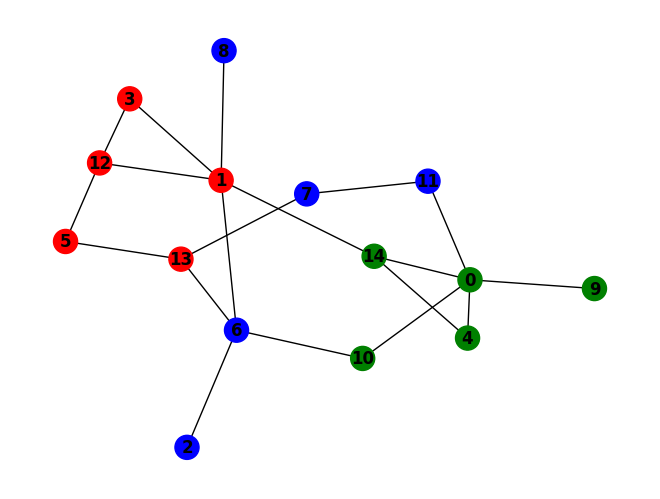

In [28]:
G = nx.Graph()
G.add_nodes_from([i for i in range(0, n)])

for i in range(0, n):
    for j in range(0, i - 1):
        if A[0][j][i] == 1:
            G.add_edge(i, j)
color_map = []
for node in G:
    if z0[node] == 1:
        color_map.append("red")
    elif z0[node] == 2:
        color_map.append("blue")
    else:
        color_map.append("green")
nx.draw(G, with_labels=True, font_weight='bold', node_color=color_map)


In [29]:
a = [1, 1, 1, 2, 3, 3, 2, 3, 2]
b = [1, 1, 3, 2, 3, 1, 2, 3, 2]
x = len(a)
x

9

In [30]:
def hamming(z1, z2):
    ans = 0
    n = len(z1)
    for i in range(0, n):
        if z1[i] != z2[i]:
            ans += 1
    return ans


hamming(a, b)

2

In [31]:
def min_hamming(z1, z2):
    z1_values = list(pd.Series(z1).value_counts().index)
    permutations = list(itertools.permutations(z1_values))
    min = 1000000000
    for i in range(0, len(permutations)):
        tmp = [0] * len(z2)
        for j in range(0, len(z2)):
            tmp[j] = permutations[i][z2[j] - 1]
        print(tmp)
        if min > hamming(tmp, z1):
            min = hamming(tmp, z1)
    return min


min_hamming(a, b)

[1, 1, 3, 2, 3, 1, 2, 3, 2]
[1, 1, 2, 3, 2, 1, 3, 2, 3]
[2, 2, 3, 1, 3, 2, 1, 3, 1]
[2, 2, 1, 3, 1, 2, 3, 1, 3]
[3, 3, 2, 1, 2, 3, 1, 2, 1]
[3, 3, 1, 2, 1, 3, 2, 1, 2]


2

In [48]:
def mle(z, p, q, A):
    # a: same cluster connected (prob = p)
    # b: same cluster not connected (prob = 1-p)
    # c: different cluster connected (prob = q)
    # d: different cluster connected (prob = 1-q)
    a, b, c, d = 0
    for i in range(0, len(z)):
        for j in range(0, i):
            if z[i] == z[j]:
                a += A[i][j]
                b += 1 - A[i][j]
            else:
                c += A[i][j]
                d += 1 - A[i][j]
    return (p ^ a) * ((1 - p) ^ b) * (q ^ c) * ((1 - q) ^ d)


def log_mle(z, p, q, A):
    # a, b, c, d = 0
    # for i in range(0, len(z)):
    #     for j in range(0, i):
    #         if z[i] == z[j]:
    #             a += A[i][j]
    #             b += 1 - A[i][j]
    #         else:
    #             c += A[i][j]
    #             d += 1 - A[i][j]
    # return a * math.log(p) + b * math.log(1 - p) + c * math.log(q) + d * math.log(1 - q)
    return math.log(mle(z, p, q, A))


def log_mle_hat(z, p, q, A):
    return -log_mle(z, p, q, A)





In [40]:
x = np.array([0] * 9).reshape(3, 3)
x = [[0] * 2 for row in range(2)]
x
len(x)

2